# Titanic Survival Classification

In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

---
## *Data Loading and Initial Exploration*
---


In [23]:
# Load the dataset
df = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

# Display first few rows
print("First few rows of the dataset:")
display(df.head())

# Basic information about the dataset
print("\nDataset information:")
df.info()

# Statistical summary
print("\nStatistical summary:")
display(df.describe(include='all'))

First few rows of the dataset:


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB

Statistical summary:


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887,887,887.000000,887.000000,887.000000,887.00000
unique,NaN,NaN,887,2,NaN,NaN,NaN,NaN
top,NaN,NaN,Mr. Patrick Dooley,male,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,573,NaN,NaN,NaN,NaN
mean,0.385569,2.305524,NaN,NaN,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,NaN,NaN,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,NaN,NaN,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,31.13750


---
## *Data Cleaning and Preprocessing*
---


In [24]:
# Check for missing values
print("Missing values in each column:")
display(df.isnull().sum())

# Handle missing values
# For Age, we'll fill missing values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)



# Feature engineering
# Create FamilySize feature
df['FamilySize'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard'] + 1

# Create IsAlone feature
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Drop unnecessary columns
df.drop(['Name', 'Siblings/Spouses Aboard', 'Parents/Children Aboard'], axis=1, inplace=True)

# Convert Sex to binary (0 for male, 1 for female)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


# Display cleaned dataset
print("\nCleaned dataset:")
display(df.head())

Missing values in each column:


,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
Siblings/Spouses Aboard,0
Parents/Children Aboard,0
Fare,0



Cleaned dataset:


/tmp/ipython-input-24-1641183312.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


,Survived,Pclass,Sex,Age,Fare,FamilySize,IsAlone
0,0,3,0,22.0,7.2500,2,0
1,1,1,1,38.0,71.2833,2,0
2,1,3,1,26.0,7.9250,1,1
3,1,1,1,35.0,53.1000,2,0
4,0,3,0,35.0,8.0500,1,1


---
## Exploratory Data Analysis (EDA)
---


/tmp/ipython-input-25-666787212.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='viridis')


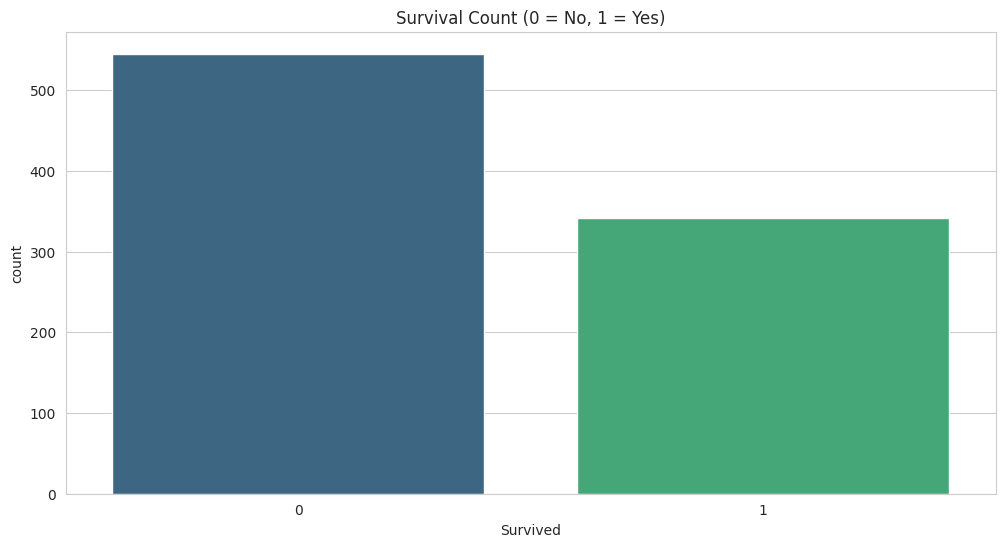

In [25]:
# Survival rate visualization
plt.figure(figsize=(12, 6))
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

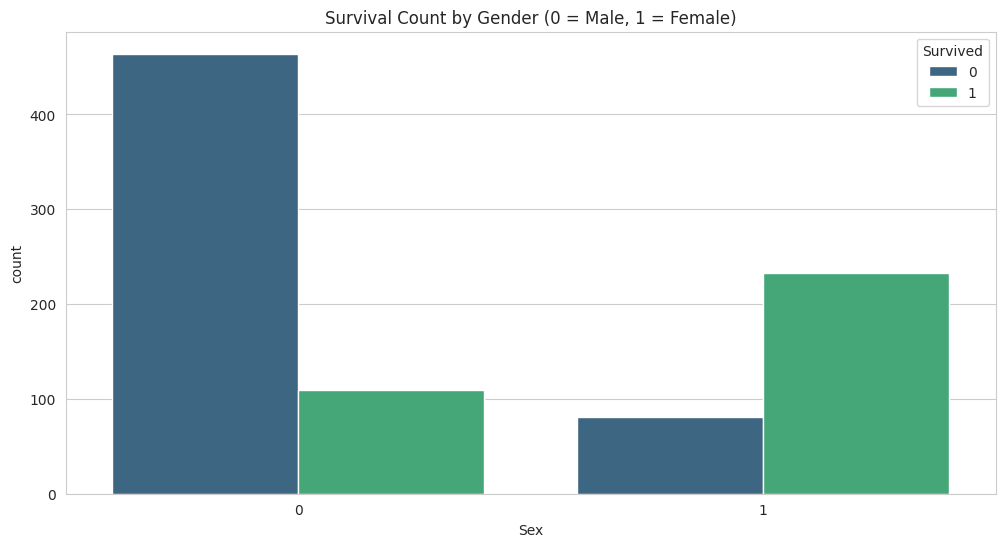

In [26]:
# Survival by gender
plt.figure(figsize=(12, 6))
sns.countplot(x='Sex', hue='Survived', data=df, palette='viridis')
plt.title('Survival Count by Gender (0 = Male, 1 = Female)')
plt.show()

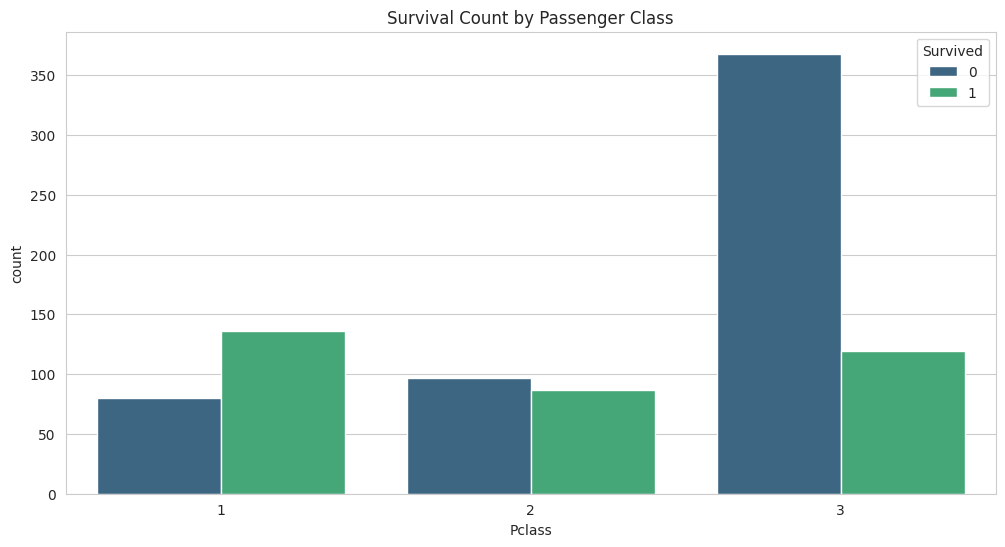

In [27]:
# Survival by passenger class
plt.figure(figsize=(12, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='viridis')
plt.title('Survival Count by Passenger Class')
plt.show()

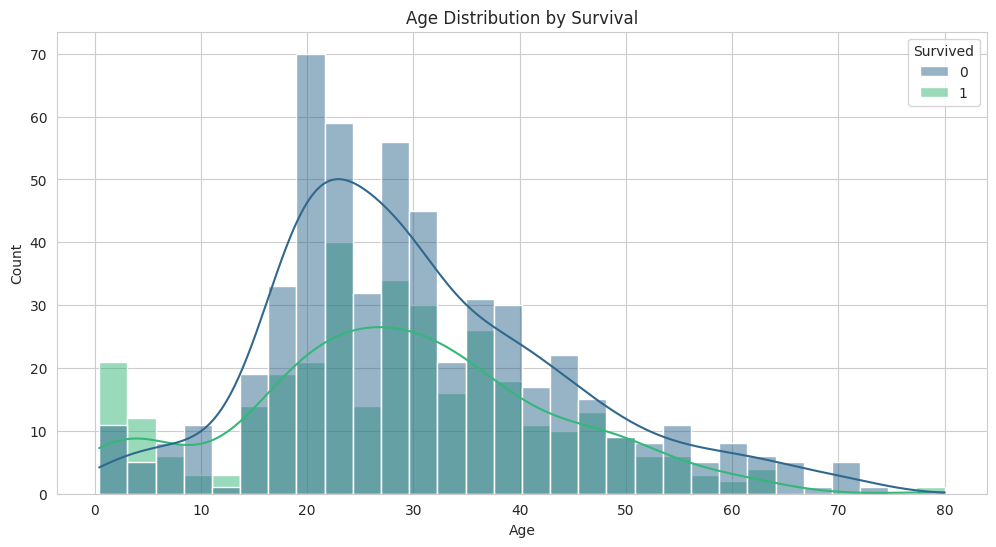

In [28]:
# Age distribution by survival
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, palette='viridis', bins=30)
plt.title('Age Distribution by Survival')
plt.show()

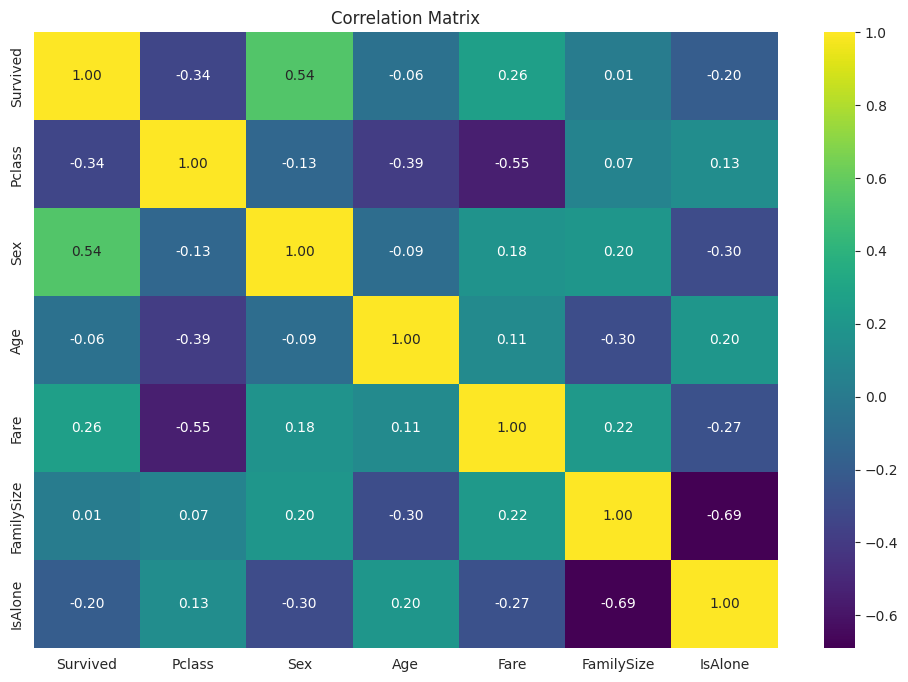

In [29]:


# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

---
## Model Building and Evaluation
---


In [30]:
# Prepare features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define preprocessing steps
numeric_features = ['Age', 'Fare', 'FamilySize']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['Pclass', 'Sex', 'IsAlone']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create pipeline with Random Forest
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))])

# Hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300}
Best cross-validation accuracy: 0.8350

Model Evaluation:
Accuracy: 0.7697
ROC AUC Score: 0.8357



Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       109
           1       0.70      0.71      0.71        69

    accuracy                           0.77       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.77      0.77      0.77       178



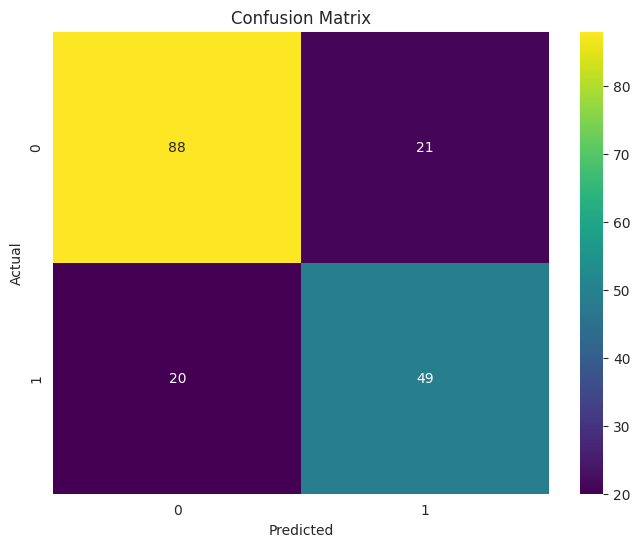

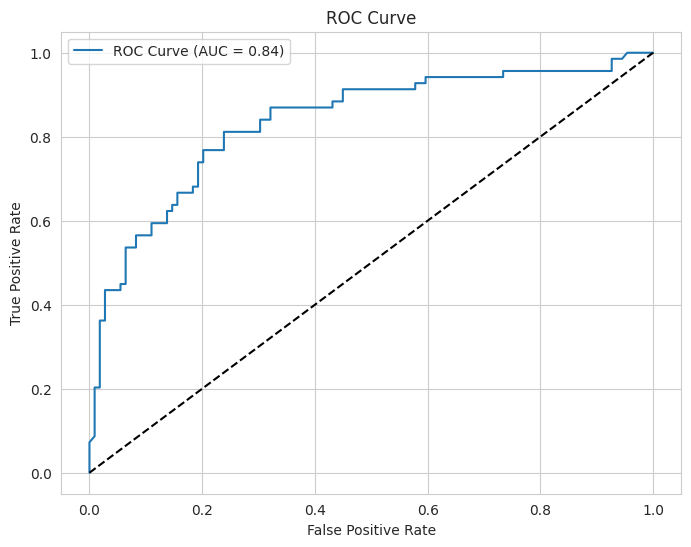

In [31]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

---
## *Feature Importance*
---

/tmp/ipython-input-32-605693685.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


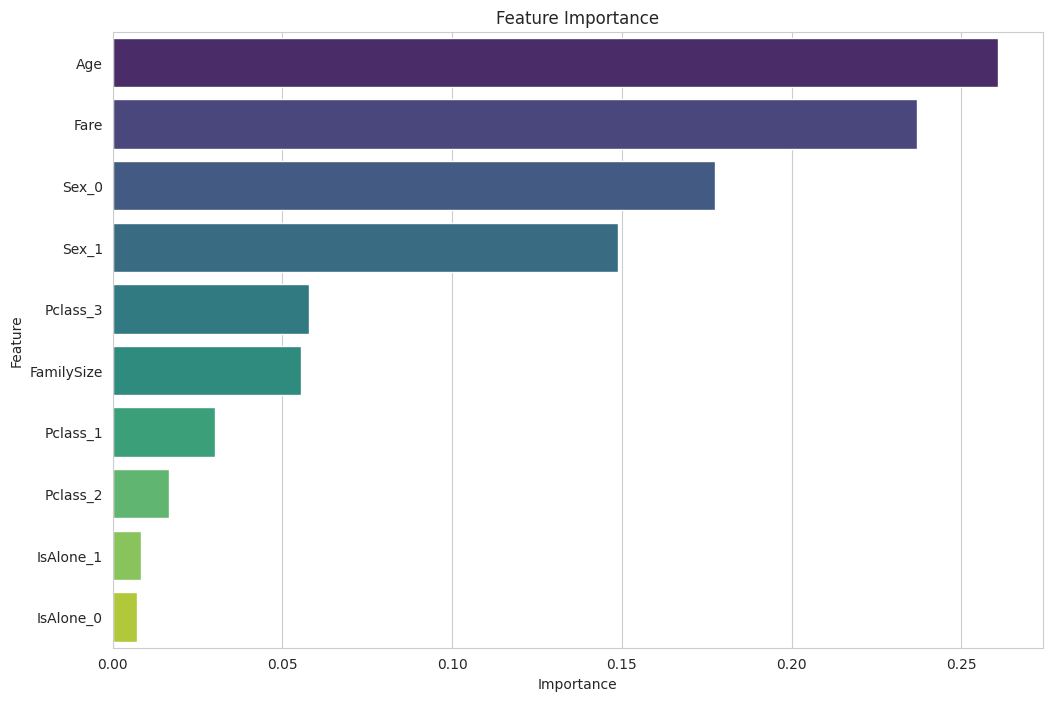

In [32]:
# Get feature names after preprocessing
preprocessor = best_model.named_steps['preprocessor']
feature_names = numeric_features.copy()

# Get one-hot encoded feature names
ohe_features = best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
feature_names.extend(ohe_features)

# Get feature importances
importances = best_model.named_steps['classifier'].feature_importances_

# Create DataFrame for visualization
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance')
plt.show()